**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral

DATASET:

https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [3]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [6]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [7]:
y=df['Sentiment'].values
y.shape

(4846,)

In [8]:
x=df['News Headline'].values
x.shape

(4846,)

**Train-test split**

In [9]:
from sklearn.model_selection import train_test_split

In [114]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [115]:
x_train.shape

(2907,)

In [116]:
y_train.shape

(2907,)

In [117]:
x_test.shape

(1939,)

In [118]:
y_test.shape

(1939,)

In [119]:
x_train

array(['Reporting in accordance with the merged business operations will start as of January 1 , 2011 .',
       'It is the last smartphone running Maemo 5 , which is to be replaced with MeeGo , a joint project between Nokia , Intel and the open source community .',
       'A meeting of Glisten shareholders to vote on the bid will be held on 12 March .',
       ...,
       'The event can also be viewed as a live webcast at www.cargotec.com .',
       "As much biomass will be used as can be sourced locally , with the rest of the plant 's fuel needs met by peat .",
       'The use of validation rule base enables verifying that processing rule bases managed by different administrators fulfil some set requirements .'],
      dtype=object)

In [120]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,Reporting in accordance with the merged busine...,neutral
1,"It is the last smartphone running Maemo 5 , wh...",neutral
2,A meeting of Glisten shareholders to vote on t...,neutral
3,"Ruukki Romania , the local arm of Finnish meta...",positive
4,stores 16 March 2010 - Finnish stationery and ...,negative


In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [122]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,The repayment of EUR 105 million debenture bon...,neutral
1,Combining the two producers will create a stro...,neutral
2,The personnel s expertise and high level of te...,neutral
3,Profit for the period fell to EUR 1.6 mn from ...,positive
4,Renzo Piano 's building design will be a wonde...,negative


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


**Pre-processing**

In [124]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [125]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [126]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Reporting in accordance with the merged busine...,neutral
1,It is the last smartphone running Maemo 5 whi...,neutral
2,A meeting of Glisten shareholders to vote on t...,neutral
3,Ruukki Romania the local arm of Finnish metal...,positive
4,stores 16 March 2010 Finnish stationery and g...,negative


In [127]:
import nltk
from nltk.corpus import stopwords

In [128]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
    


In [130]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

**Create unigrams**

In [131]:
from collections import defaultdict

In [132]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [133]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Ruukki', 'Romania', '', 'local', 'arm', 'Finnish', 'metal', 'producer', 'Ruukki', '', 'increased', 'capital', '900000', 'euro', '', '', '114', 'mln', '', 'cash', 'contribution', '', 'reported', 'September', '19', '', '2006', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'thirdquarter', 'pretax', 'profit', 'doubled', 'EUR', '197mn', '']
Sentence after removing stopwords: ['The', 'move', 'aimed', 'boosting', 'sales', '', 'costefficiency', 'market', 'share', 'Finland', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'double', 'investments', 'new', 'specialty', 'glassfiber', 'reinforcement', 'plant', 'South', 'Carolina', '', 'US', '']
Sentence after removing stopwords: ['Under', 'memorandum', 'understanding', 'MoU', 'parties', 'collaborate', 'preparing', 'implementing', 'joint', 'projects', 'fields', 'combined', 'power', 'heat', 'generation', ''

In [134]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'Ruukki': 11,
             'Romania': 2,
             '': 2235,
             'local': 5,
             'arm': 1,
             'Finnish': 118,
             'metal': 7,
             'producer': 6,
             'increased': 54,
             'capital': 10,
             '900000': 1,
             'euro': 35,
             '114': 4,
             'mln': 85,
             'cash': 8,
             'contribution': 1,
             'reported': 6,
             'September': 9,
             '19': 5,
             '2006': 40,
             'The': 161,
             'pipeline': 1,
             'strong': 15,
             'Stora': 5,
             'Enso': 4,
             'thirdquarter': 3,
             'pretax': 12,
             'profit': 106,
             'doubled': 4,
             'EUR': 233,
             '197mn': 1,
             'move': 4,
             'aimed': 4,
             'boosting': 1,
             'sales': 106,
             'costefficiency': 2,
             'market': 40,
  

In [135]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('Ruukki', 11), ('Romania', 2), ('', 2235), ('local', 5), ('arm', 1), ('Finnish', 118), ('metal', 7), ('producer', 6), ('increased', 54), ('capital', 10), ('900000', 1), ('euro', 35), ('114', 4), ('mln', 85), ('cash', 8), ('contribution', 1), ('reported', 6), ('September', 9), ('19', 5), ('2006', 40), ('The', 161), ('pipeline', 1), ('strong', 15), ('Stora', 5), ('Enso', 4), ('thirdquarter', 3), ('pretax', 12), ('profit', 106), ('doubled', 4), ('EUR', 233), ('197mn', 1), ('move', 4), ('aimed', 4), ('boosting', 1), ('sales', 106), ('costefficiency', 2), ('market', 40), ('share', 38), ('Finland', 48), ('Ahlstrom', 2), ('Corporation', 22), ('double', 5), ('investments', 4), ('new', 43), ('specialty', 1), ('glassfiber', 1), ('reinforcement', 1), ('plant', 17), ('South', 4), ('Carolina', 1), ('US', 12), ('Under', 5), ('memorandum', 3), ('understanding', 3), ('MoU', 1), ('parties', 3), ('collaborate', 1), ('preparing', 1), ('implementing', 3), ('joint', 3), ('projects', 9), ('fiel

In [136]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

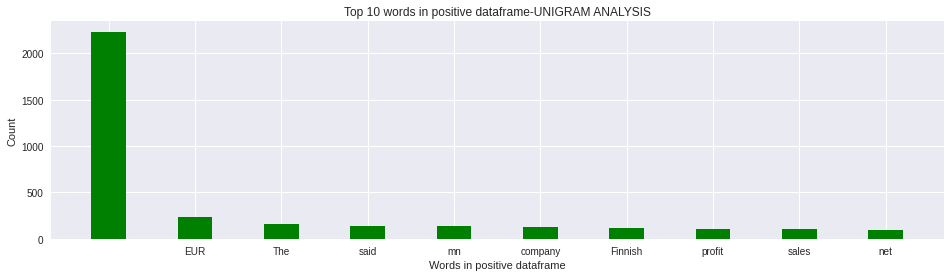

In [161]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [162]:
df_positive.head(10)

,0,1
0,,2235
1,EUR,233
2,The,161
3,said,141
4,mn,141
5,company,130
6,Finnish,118
7,profit,106
8,sales,106
9,net,97


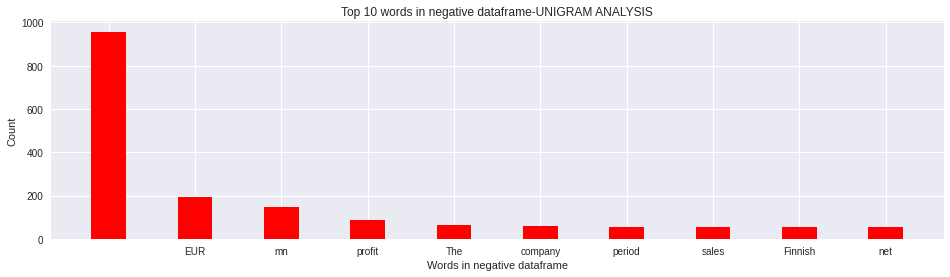

In [163]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [164]:
df_negative.head(10)

,0,1
0,,957
1,EUR,195
2,mn,145
3,profit,87
4,The,64
5,company,60
6,period,56
7,sales,55
8,Finnish,54
9,net,54


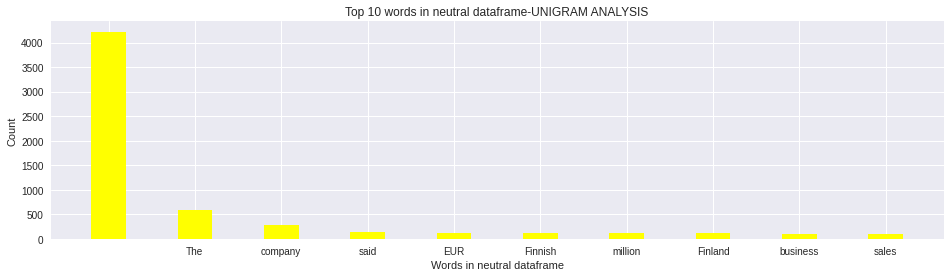

In [165]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [166]:
df_neutral.head(10)

,0,1
0,,4221
1,The,580
2,company,278
3,said,139
4,EUR,128
5,Finnish,120
6,million,119
7,Finland,112
8,business,96
9,sales,94


**Creating bigrams**

In [167]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [168]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Ruukki', 'Romania', '', 'local', 'arm', 'Finnish', 'metal', 'producer', 'Ruukki', '', 'increased', 'capital', '900000', 'euro', '', '', '114', 'mln', '', 'cash', 'contribution', '', 'reported', 'September', '19', '', '2006', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'thirdquarter', 'pretax', 'profit', 'doubled', 'EUR', '197mn', '']
Sentence after removing stopwords: ['The', 'move', 'aimed', 'boosting', 'sales', '', 'costefficiency', 'market', 'share', 'Finland', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'double', 'investments', 'new', 'specialty', 'glassfiber', 'reinforcement', 'plant', 'South', 'Carolina', '', 'US', '']
Sentence after removing stopwords: ['Under', 'memorandum', 'understanding', 'MoU', 'parties', 'collaborate', 'preparing', 'implementing', 'joint', 'projects', 'fields', 'combined', 'power', 'heat', 'generation', ''

In [169]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

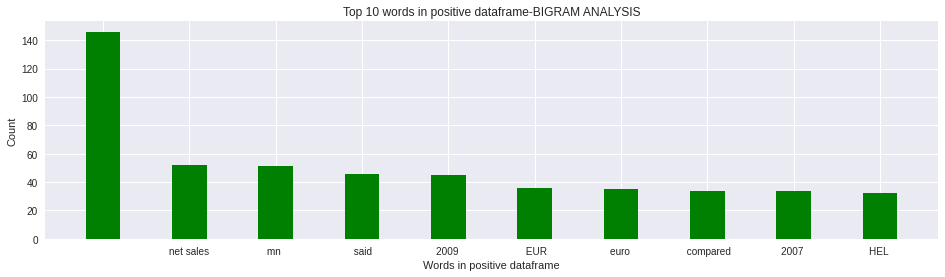

In [170]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [171]:
df_positive2.head(10)

,0,1
0,,146
1,net sales,52
2,mn,51
3,said,46
4,2009,45
5,EUR,36
6,euro,35
7,compared,34
8,2007,34
9,HEL,32


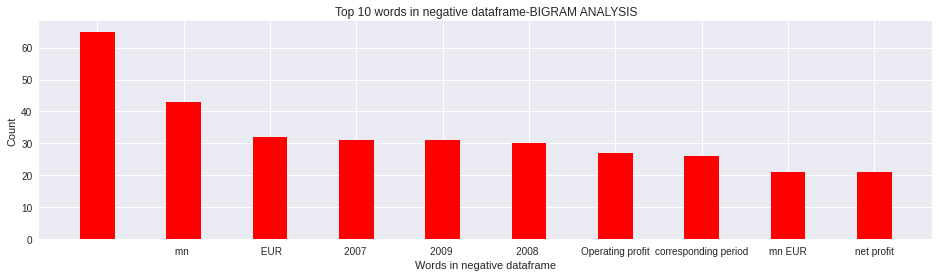

In [172]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [173]:
df_negative2.head(10)

,0,1
0,,65
1,mn,43
2,EUR,32
3,2007,31
4,2009,31
5,2008,30
6,Operating profit,27
7,corresponding period,26
8,mn EUR,21
9,net profit,21


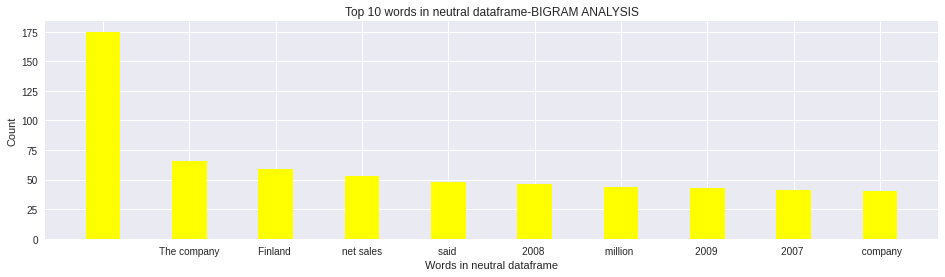

In [174]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [175]:
df_neutral2.head(10)

,0,1
0,,175
1,The company,66
2,Finland,59
3,net sales,53
4,said,48
5,2008,46
6,million,44
7,2009,43
8,2007,41
9,company,40


**Creating trigrams**

In [176]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [177]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['Ruukki', 'Romania', '', 'local', 'arm', 'Finnish', 'metal', 'producer', 'Ruukki', '', 'increased', 'capital', '900000', 'euro', '', '', '114', 'mln', '', 'cash', 'contribution', '', 'reported', 'September', '19', '', '2006', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'thirdquarter', 'pretax', 'profit', 'doubled', 'EUR', '197mn', '']
Sentence after removing stopwords: ['The', 'move', 'aimed', 'boosting', 'sales', '', 'costefficiency', 'market', 'share', 'Finland', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'double', 'investments', 'new', 'specialty', 'glassfiber', 'reinforcement', 'plant', 'South', 'Carolina', '', 'US', '']
Sentence after removing stopwords: ['Under', 'memorandum', 'understanding', 'MoU', 'parties', 'collaborate', 'preparing', 'implementing', 'joint', 'projects', 'fields', 'combined', 'power', 'heat', 'generation', ''

In [178]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

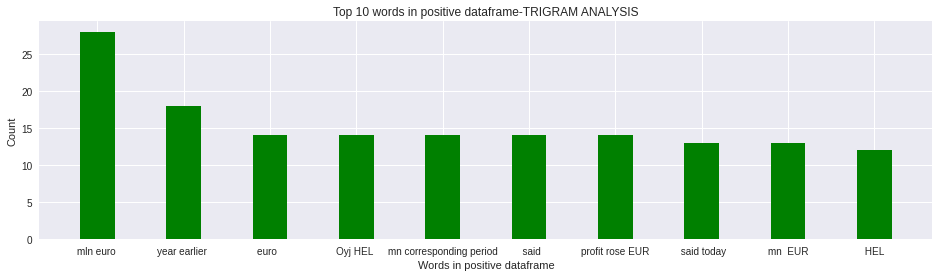

In [179]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [180]:
df_positive3.head(10)

,0,1
0,mln euro,28
1,year earlier,18
2,euro,14
3,Oyj HEL,14
4,mn corresponding period,14
5,said,14
6,profit rose EUR,14
7,said today,13
8,mn EUR,13
9,HEL,12


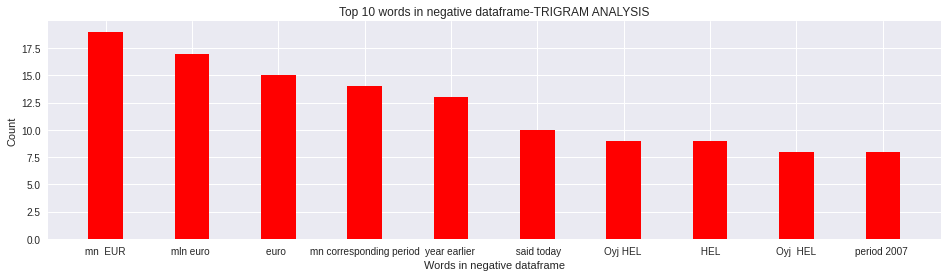

In [181]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [182]:
df_negative3.head(10)

,0,1
0,mn EUR,19
1,mln euro,17
2,euro,15
3,mn corresponding period,14
4,year earlier,13
5,said today,10
6,Oyj HEL,9
7,HEL,9
8,Oyj HEL,8
9,period 2007,8


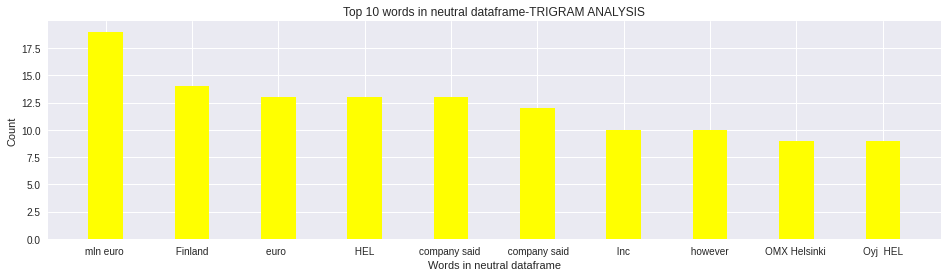

In [183]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [184]:
df_neutral3.head(10)

,0,1
0,mln euro,19
1,Finland,14
2,euro,13
3,HEL,13
4,company said,13
5,company said,12
6,Inc,10
7,however,10
8,OMX Helsinki,9
9,Oyj HEL,9


**Using CountVectorizer()**

-can also b used to check the most common bigrams